<a href="https://colab.research.google.com/github/andijosua/Learning/blob/main/5_ANDI_JOSUA_SIMANULLANG_Rockpaperscissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Andi Josua Simanullang**
Submission rockpaperscissors



In [ ]:
import tensorflow as tf
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip


--2020-11-10 05:02:21--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.81MB/s    in 43s     

2020-11-10 05:03:05 (7.10 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakkukan ekstraksi pada file zip yang sudah didownload
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# membuat nama directory
base_directory = '/tmp/rockpaperscissors/rps-cv-images'
rock_directory = os.path.join(base_directory,'rock')
paper_directory = os.path.join(base_directory, 'paper')
scissors_directory = os.path.join(base_directory, 'scissors')

# membuat direktori train dan validation
# Karena sebelumnya directory untuk train dan validation belum ada, maka sekarang kita buat directorynya terlebih dahulu
train_directory = os.path.join(base_directory,'train')
validation_directory = os.path.join(base_directory, 'validation')

# Fungsi yang dapat digunakan untuk membuat directory/path baru adalah "os.mkdir"
if not os.path.exists(train_directory):
    os.mkdir(train_directory)

if not os.path.exists(validation_directory):
    os.mkdir(validation_directory)

# Berdasarkan bantuan kak Aninditya Anggari pada forum diskusi, maka perintah akan membuat path baru apabila filenya belum exist
# Apabila file yang dimaksud sudah exist, maka perintah membuat path tidak akan dijalankan

In [ ]:
# membagi total data rock, scissors, dan paper menjadi 40% validation's data dan 60% lainnya sebagai training's data
train_rock_dir, validation_rock_dir = train_test_split(os.listdir(rock_directory), test_size = 0.40)
train_paper_dir, validation_paper_dir = train_test_split(os.listdir(paper_directory), test_size = 0.40)
train_scissors_dir, validation_scissors_dir = train_test_split(os.listdir(scissors_directory), test_size = 0.40)

In [ ]:
#Setelah data dari ketiga kelas di atas dibagi menjadi 40% validation's data dan 60% lainnya sebagai training's data
#Sekarang kita membuat directory untuk menyimpan hasil split data dari ketiga kelas tersebut
# Langkah pertama adalag dengan membuat nama directory-nya

train_rock = os.path.join(train_directory, 'rock')
train_paper = os.path.join(train_directory, 'paper')
train_scissors = os.path.join(train_directory, 'scissors')
validation_rock = os.path.join(validation_directory, 'rock')
validation_paper = os.path.join(validation_directory, 'paper')
validation_scissors = os.path.join(validation_directory, 'scissors')

# Keenam sub-directory di atas berada pada dalam train_directory dan validation_directory
# Fungsi yang dapat digunakan untuk membuat directory/path baru adalah "os.mkdir"
# Berdasarkan bantuan kak Aninditya Anggari pada forum diskusi, maka perintah membuat path baru apabila filenya belum exist
# Apabila file yang dimaksud sudah exist, maka perintah akan membuat path tidak akan dijalankan
if not os.path.exists(train_rock):
    os.mkdir(train_rock)
if not os.path.exists(train_paper):  
    os.mkdir(train_paper)
if not os.path.exists(train_scissors):
    os.mkdir(train_scissors)
if not os.path.exists(validation_rock):
    os.mkdir(validation_rock)
if not os.path.exists(validation_paper):
    os.mkdir(validation_paper)
if not os.path.exists(validation_scissors):
    os.mkdir(validation_scissors)

In [ ]:
#Setelah kita membuat directory untuk menyimpan data training dan data validation dari ketiga kelas di atas
#Maka saatnya kita meamasukkan data hasil split tersebut ke directorynya masing-masing
#Tools yang dapat kita gunakan adalah "shutil. copy ( src , dest )" https://www.pythonforbeginners.com/os/python-the-shutil-module

for file in train_rock_dir: #train_rock_dir adalah data training untuk rock 
    shutil.copy(os.path.join(rock_directory, file), os.path.join(train_rock, file)) # Semua data train_rock_dir dari rock_directory akan dicopy ke directory train_rock
for file in train_paper_dir:                                                      
    shutil.copy(os.path.join(paper_directory,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
    shutil.copy(os.path.join(scissors_directory,file), os.path.join(train_scissors,file))
for file in validation_rock_dir:
    shutil.copy(os.path.join(rock_directory, file), os.path.join(validation_rock,file))
for file in validation_paper_dir:
    shutil.copy(os.path.join(paper_directory,file), os.path.join(validation_paper,file))
for file in validation_scissors_dir:
    shutil.copy(os.path.join(scissors_directory,file), os.path.join(validation_scissors,file))


In [ ]:
# Selanjutnya melakukan augmentasi gambar menggunakan ImageDataGenerator
#Pertama kita lakukan untuk data training
train_datagen = ImageDataGenerator(
        rescale = 1./255,       # Nilai pixel adalah antara 0 -255, dengan menggunakan fungsi rescale=1/255 maka datanya menjadi antara 0 - 1
	      rotation_range=30,      # Besar rentang derajat untuk rotasi acak
        width_shift_range=0.2,  # Rentang nilai untuk pergeseran horizontal acak 
        height_shift_range=0.2, # Rentang nilai untuk satu pergeseran vertikal acak
        shear_range=0.2,        # Sudut geser pada arah berlawanan jarum jam (radian)
        zoom_range=0.2,         # Rentang nilai untuk pembesaran secara acah
        horizontal_flip=True,   #Gambarnya akan diflip secara horizontal
        fill_mode='nearest')    #Titik di luar batas input diisi sesuai dengan mode yang diberikan

train_generator = train_datagen.flow_from_directory(
	      train_directory,          # direktori data train
	      target_size=(150,100),    # mengubah resolusi seluruh gambar menjadi 150x100 piksel
	      class_mode='categorical', #karena merupakan klasifikasi 3 buah kelas maka menggunakan class_mode = 'categorial'
        batch_size=32             #Karena ada 1312 sampel data training, batch_size yang kita pilih adalah 32(Faktor dari 1312)
)                           #Maka jumlah iterasi dalam sekali epoch berjumlah 41 kali, sumber: https://imam.digmi.id/post/memahami-epoch-batch-size-dan-iteration/

#Selanjutnya kita lakukan untuk data validation
validation_datagen = ImageDataGenerator(
        rescale = 1./255,
	      rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

validation_generator = validation_datagen.flow_from_directory(
	      validation_directory,      # Direktori data validation
	      target_size=(150,100),     # Mengubah resolusi seluruh gambar menjadi 150x100 piksel
	      class_mode='categorical',  # karena merupakan klasifikasi 3 buah kelas maka menggunakan class_mode = 'categorial'
        batch_size=32              # Karena batch_size 32, maka jumlah iterasi dalam sekali epoch adalah 27,375
)                                  # Iterasinya dibulatkan menjadi 27 kali dalam 1 epoch, ketika saya coba sebesar 28 kali terjadi error  

Found 2035 images belonging to 3 classes.
Found 1709 images belonging to 3 classes.


In [ ]:
# membuat model sequential
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,100,3)), #Kita konvolusi menjadi 32 bagian berukuran 3x3, (150,100) adalah Ukuran pixel input, 3 adalah RGB
      tf.keras.layers.MaxPooling2D(2,2),                     # Dengan filter 2x2, kita ambil nilai maximum pada tiap area pergeseran filter 
      tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),  # Kemudian dikonvolusikan kembali menjadi 64 bagian berukuran 3x3
      tf.keras.layers.MaxPooling2D(2,2),                     # Dengan filter 2x2, kita ambil nilai maximum pada tiap area pergeseran filter 
      tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'), # Kemudian dikonvolusikan kembali menjadi 128 bagian berukuran 3x3
      tf.keras.layers.MaxPooling2D(2,2),                     # Dengan filter 2x2, kita ambil nilai maximum pada tiap area pergeseran filter
      tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'), # Kemudian dikonvolusikan kembali menjadi 256 bagian berukuran 3x3
      tf.keras.layers.MaxPooling2D(2,2),                     # Dengan filter 2x2, kita ambil nilai maximum pada tiap area pergeseran filter
      tf.keras.layers.Dropout(0.2),                          # Mencegah overfitting
      tf.keras.layers.Flatten(),                             # Untuk membuat semua matriks menjadi berukuran single vektor dan menjadi input bagi layer berikutnya
      tf.keras.layers.Dense(512, activation= 'relu'),       
      tf.keras.layers.Dense(3, activation= 'softmax')        # Angka 3 menunjukkan jumlah kelas
])                                                       # Kita menggunakan softmax karena dapat melakukan prediksi untuk multiclass



In [ ]:
# Supaya model yang telah dibuat bisa belajar, kita panggil fungsi compile 
# Model compile yang kita gunakan adalah loss function serta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])           # Metrics berfungsi untuk menampilkan metrik yang dipilih pada proses pelatihan model

Epoch 1/100
41/41 - 13s - loss: 1.0385 - accuracy: 0.4326 - val_loss: 0.9269 - val_accuracy: 0.5312
Epoch 2/100
41/41 - 12s - loss: 0.7619 - accuracy: 0.6105 - val_loss: 0.6208 - val_accuracy: 0.6944
Epoch 3/100
41/41 - 12s - loss: 0.4869 - accuracy: 0.8068 - val_loss: 0.3453 - val_accuracy: 0.8947
Epoch 4/100
41/41 - 12s - loss: 0.2651 - accuracy: 0.9276 - val_loss: 0.2029 - val_accuracy: 0.9375
Epoch 5/100
41/41 - 12s - loss: 0.2041 - accuracy: 0.9307 - val_loss: 0.1733 - val_accuracy: 0.9363
Epoch 6/100
41/41 - 12s - loss: 0.1661 - accuracy: 0.9474 - val_loss: 0.4364 - val_accuracy: 0.8773
Epoch 7/100
41/41 - 12s - loss: 0.1519 - accuracy: 0.9527 - val_loss: 0.1637 - val_accuracy: 0.9514
Epoch 8/100
41/41 - 12s - loss: 0.1398 - accuracy: 0.9554 - val_loss: 0.1253 - val_accuracy: 0.9583
Epoch 9/100
41/41 - 12s - loss: 0.1265 - accuracy: 0.9566 - val_loss: 0.1696 - val_accuracy: 0.9410
Epoch 10/100
41/41 - 12s - loss: 0.0916 - accuracy: 0.9707 - val_loss: 0.1535 - val_accuracy: 0.9583

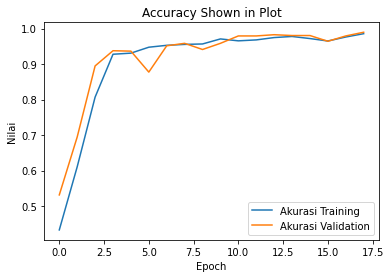

In [ ]:
# Melakukan pelatihan model menggunakan metode fit
# Dengan menggunakan image data generator, kita tidak perlu memasukkan parameter gambar dan labelnya
# Imagedatagenerator secara otomatis melabeli sebuah gambar sesuai dengan direktori di mana ia disimpan

# Steps_per_epoch = Datasets/Batch.
# Batch = 32, Datasets Training = 1312, Datasets Validation = 876

# Sebelumnya, Kita dapat menggunakan callback
# Callback berfungsi mencegah overfitting
# Selain itu callback juga dapat digunakan membuat treshold accuracy untuk menghentikan pelatihan
# Sehingga looping pelatihan akan berhenti saat threshold accuracy terpenuhi 

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy') > 0.98):            # Threshold accuracy saya buat 0.98, karena awalnya saya buat 0.96 tapi masih salah prediksi
        print("\nAkurasi tercapai")
        self.model.stop_training = True
callbacks = myCallback() 

history = model.fit(
    train_generator,
    steps_per_epoch = 41,                   # Menunjukkan jumlah iterasi dalam sekali epoch training.
    epochs = 100,                            
    validation_data = validation_generator,
    validation_steps = 27,                  # Menunjukkan jumlah iterasi dalam sekali epoch validation 
    verbose =2,
      callbacks=[callbacks]
)

# Semakin besar epoch, maka pemodelan akan semakin lama. Namun, accuracy semakin baik.
# Namun karena kita sudah menggunakan callback, maka epoch akan berhenti saat threshold akurasi tercapai


#Kemudian kita tunjukkan accuracy taining dan validation dalam grafik

plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validation')
plt.title('Accuracy Shown in Plot')
plt.ylabel('Nilai')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Kemudian kita membuat section untuk memungkinkan kita untuk secara interaktif memilih sebuah berkas gambar lalu mengujinya
# kemudian melakukan resize gambar dan mengubahnya menjadi larik numpy
# Kodenya dapat mengikuti pada Modul Latihan Membuat Model Klasifikasi Gambar

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # Memprediksi gambar
    path = fn 
    img = image.load_img(path, target_size = (150,100))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size = 32)

    print(fn)
    if classes[0,0]!= 0:
      print('paper')
    elif classes[0,1]!= 0:
      print('rock')
    else:
      print('scissors')